In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot as qq
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [26]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

In [27]:
data = pd.read_csv('/content/AAPL.csv')

In [28]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [29]:
##Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [30]:
##Summary Statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


# Data Preprocessing

In [31]:
##Converting Date to DateTime Object
data['Date']

,Date
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09
...,...
2006,2019-12-23
2007,2019-12-24
2008,2019-12-26
2009,2019-12-27


In [32]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [33]:
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [34]:
##Making Date as Index
data.set_index('Date',inplace=True)

In [35]:
data['Date'] = data.index

In [36]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09


In [37]:
##Checking Null Values
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Date,0


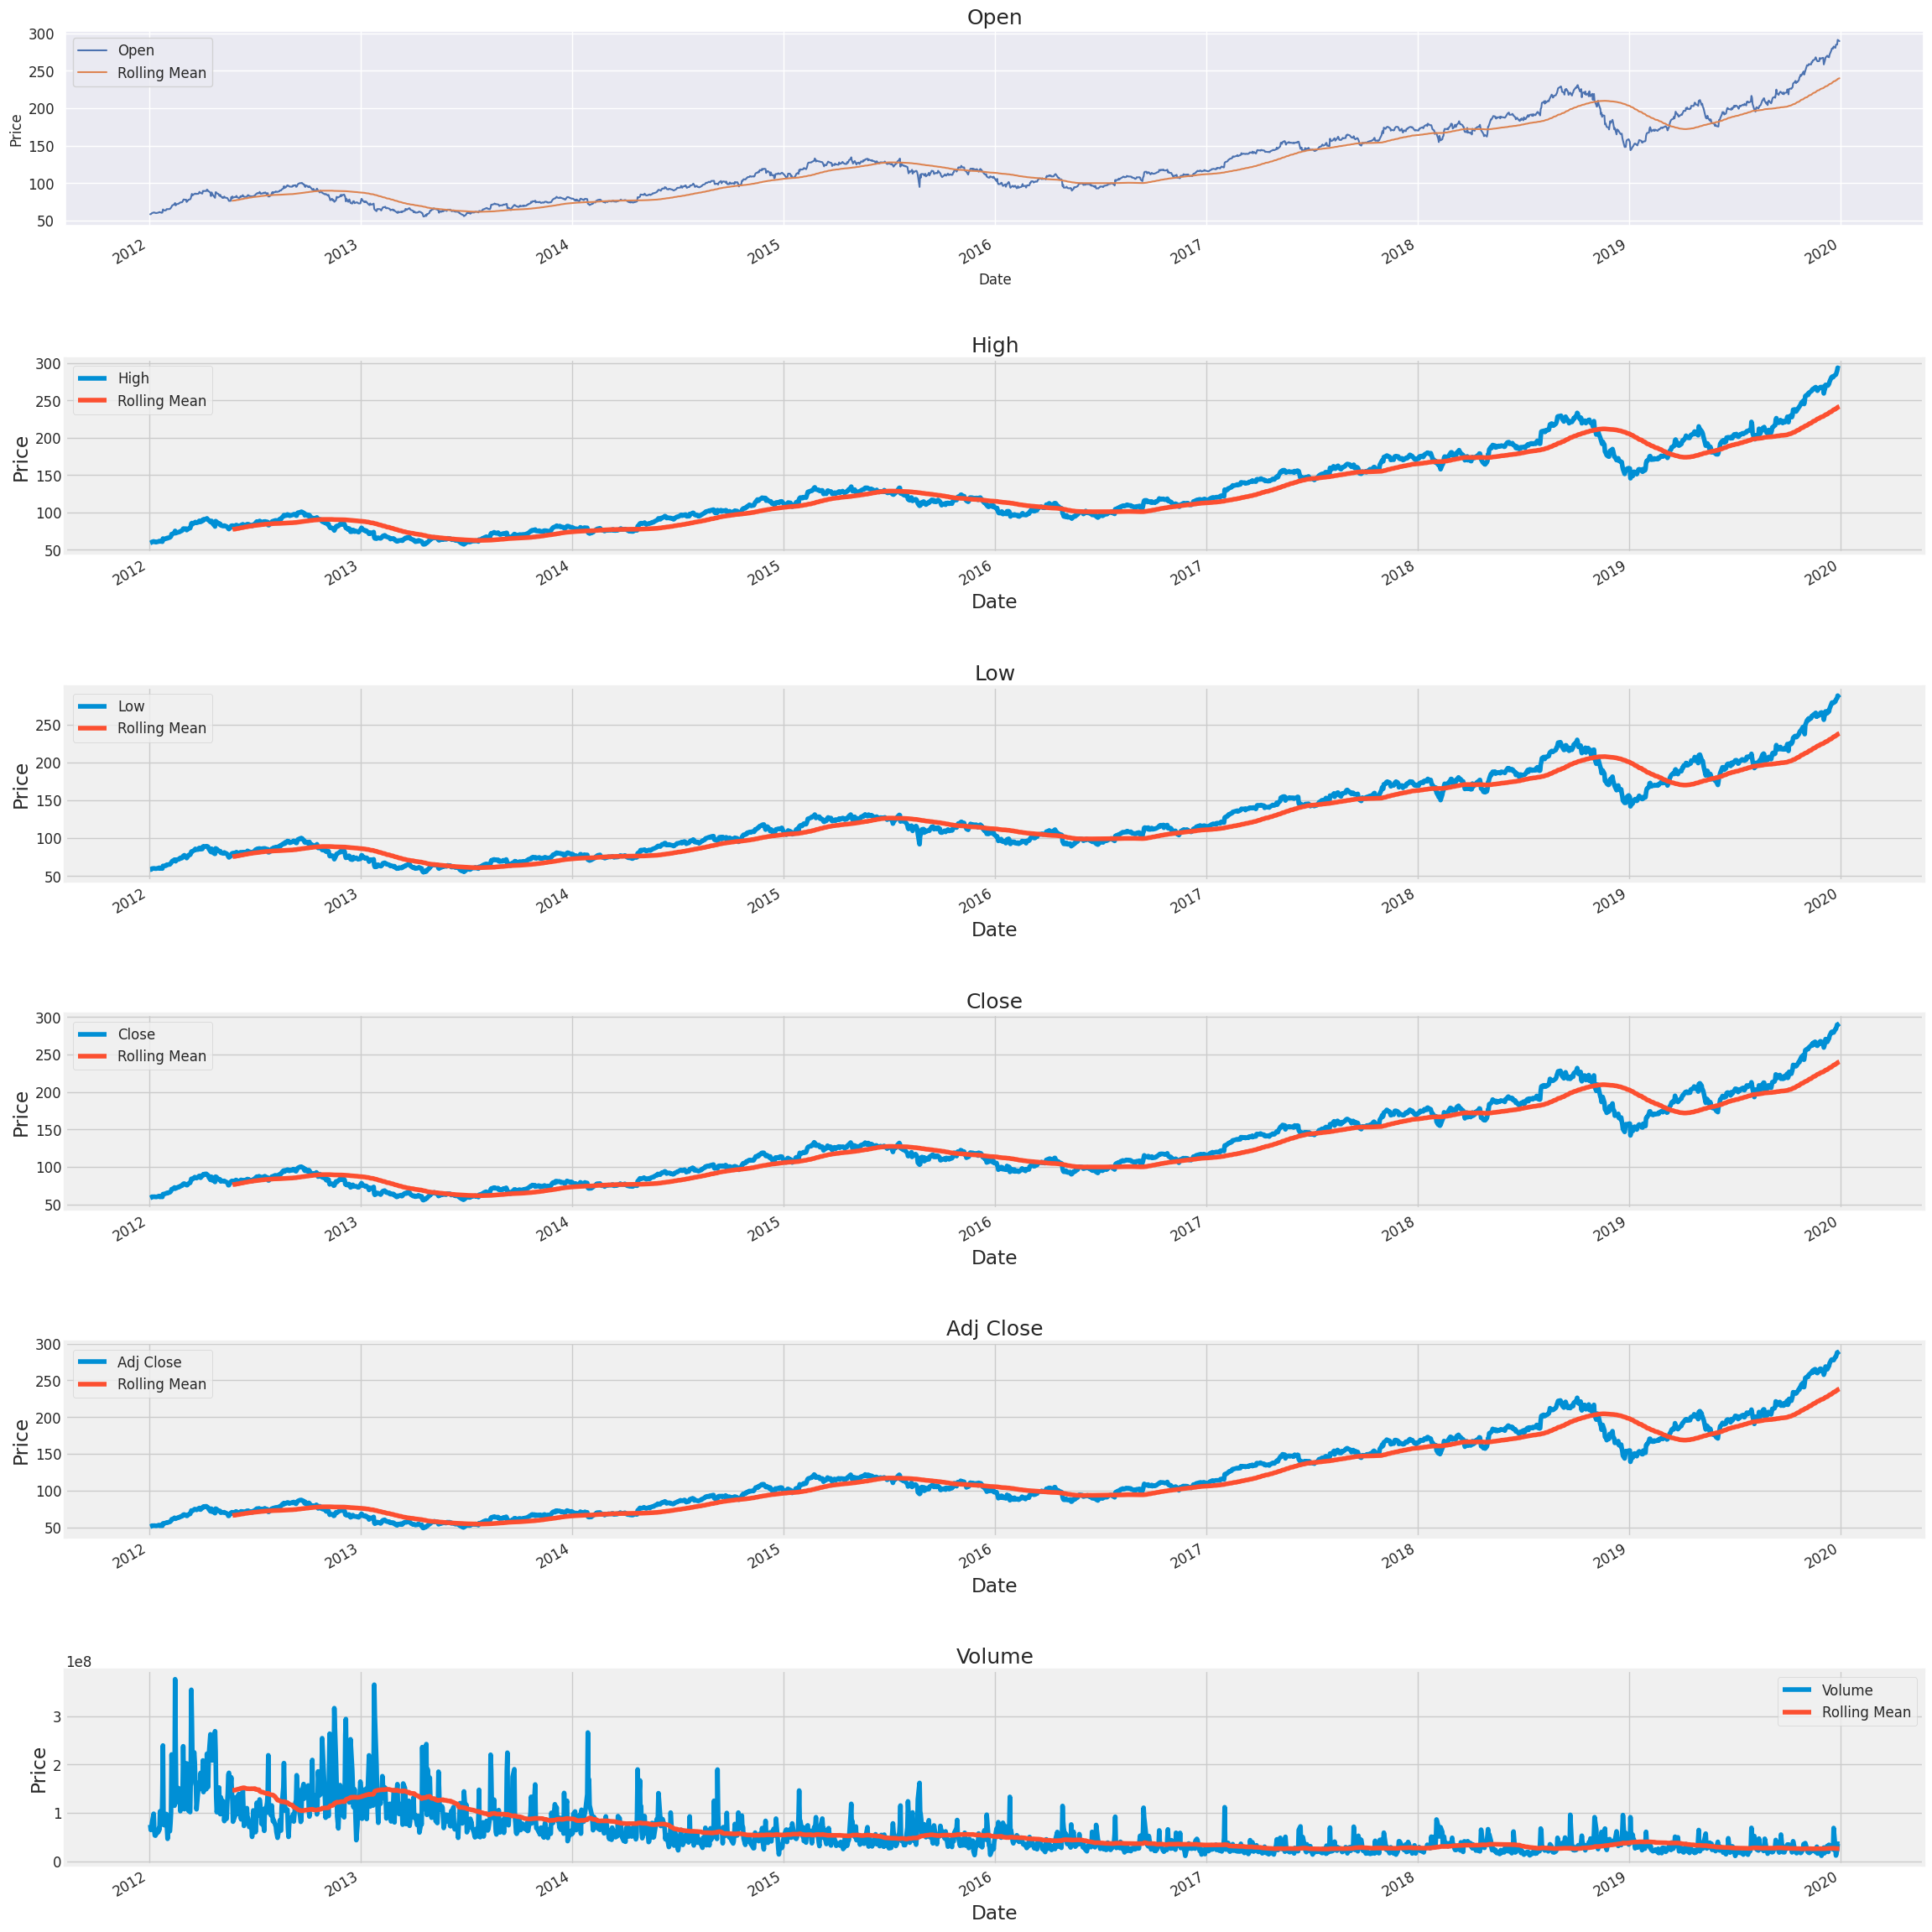

In [38]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')
  plt.legend(prop={'size': 12})

fig.tight_layout(pad=3.0)

plt.show()

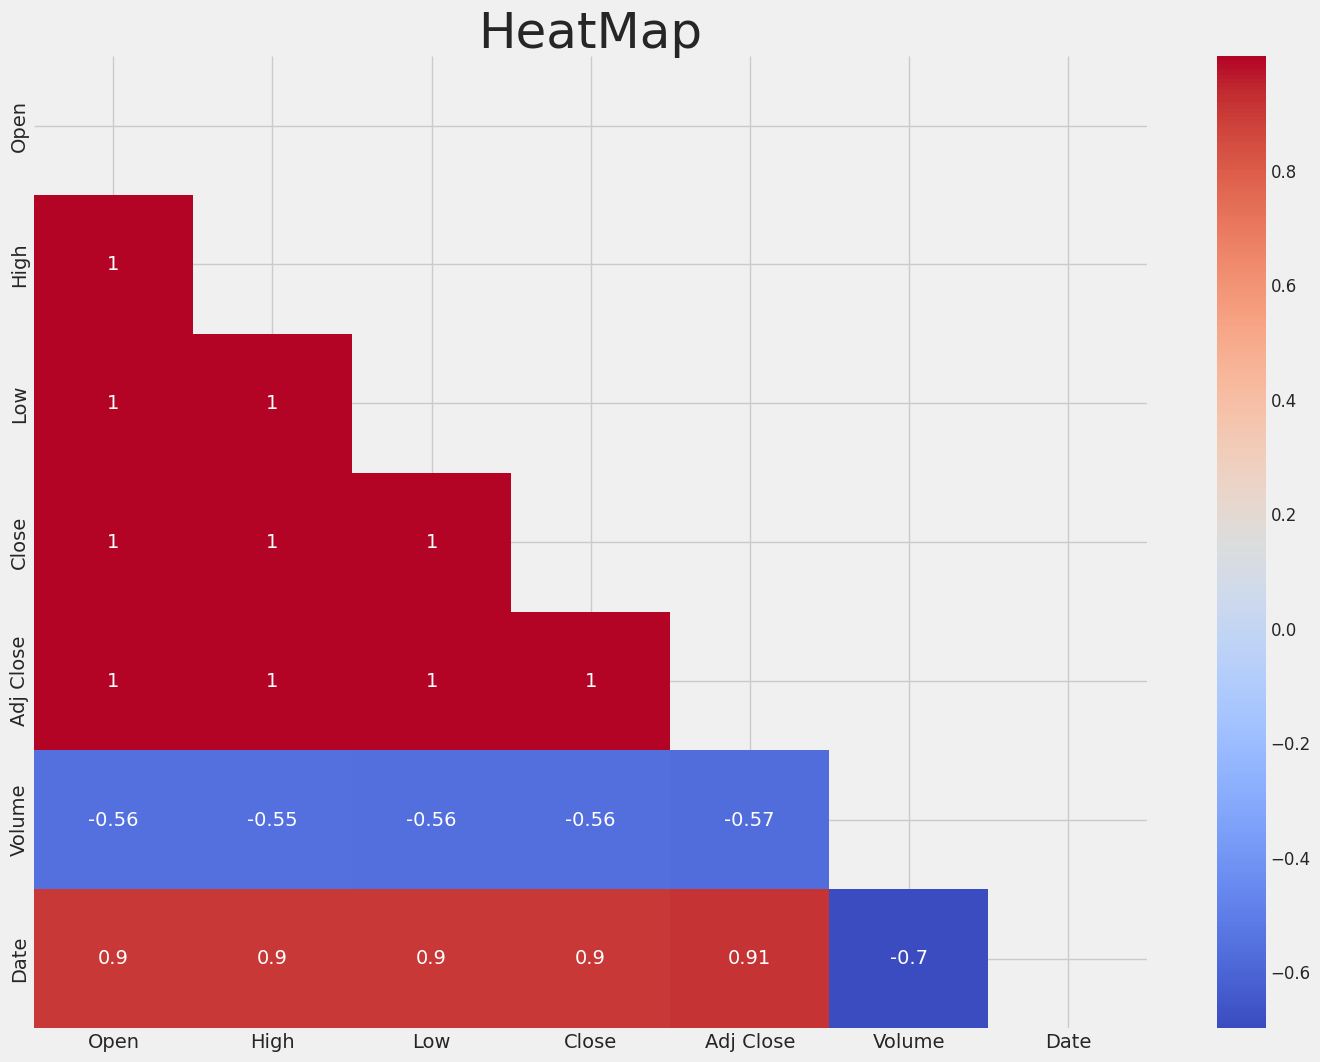

In [39]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [40]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


In [41]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2012-01-03,2012-01-03,50.765709
2012-01-04,2012-01-04,51.038536
2012-01-05,2012-01-05,51.605175
2012-01-06,2012-01-06,52.144630
2012-01-09,2012-01-09,52.061932
...,...,...
2019-12-23,2019-12-23,282.054138
2019-12-24,2019-12-24,282.322266
2019-12-26,2019-12-26,287.923645


# Resampling

In [42]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

In [43]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


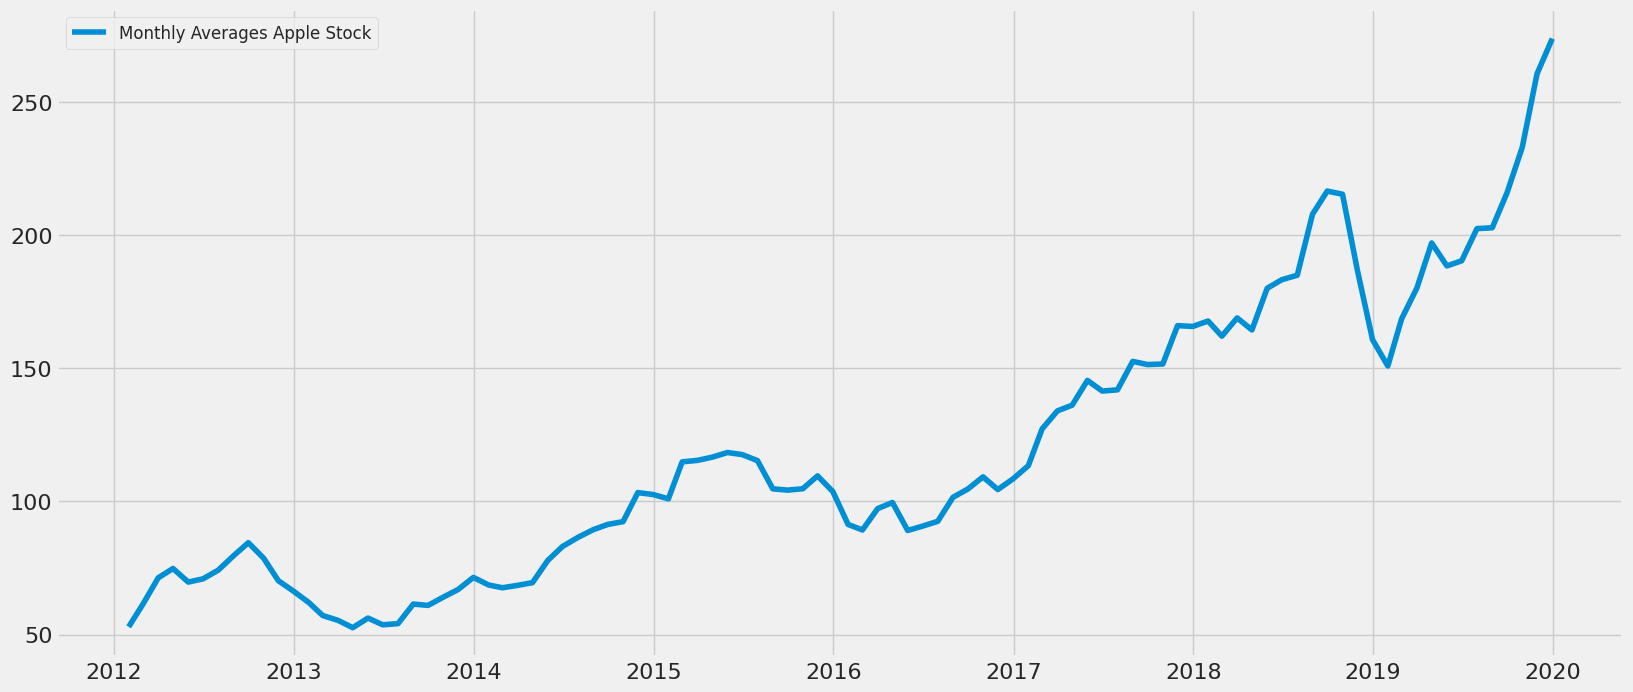

In [44]:
##Monthly Stock Price
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

# Exploratory Data Analysis

In [45]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,52.907298,2012,January,Tuesday,1
2012-02-29,61.424381,2012,February,Wednesday,1
2012-03-31,71.292448,2012,March,Saturday,1
2012-04-30,74.810151,2012,April,Monday,2
2012-05-31,69.708045,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,202.738817,2019,August,Saturday,3
2019-09-30,215.853332,2019,September,Monday,3
2019-10-31,232.974974,2019,October,Thursday,4


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012')])

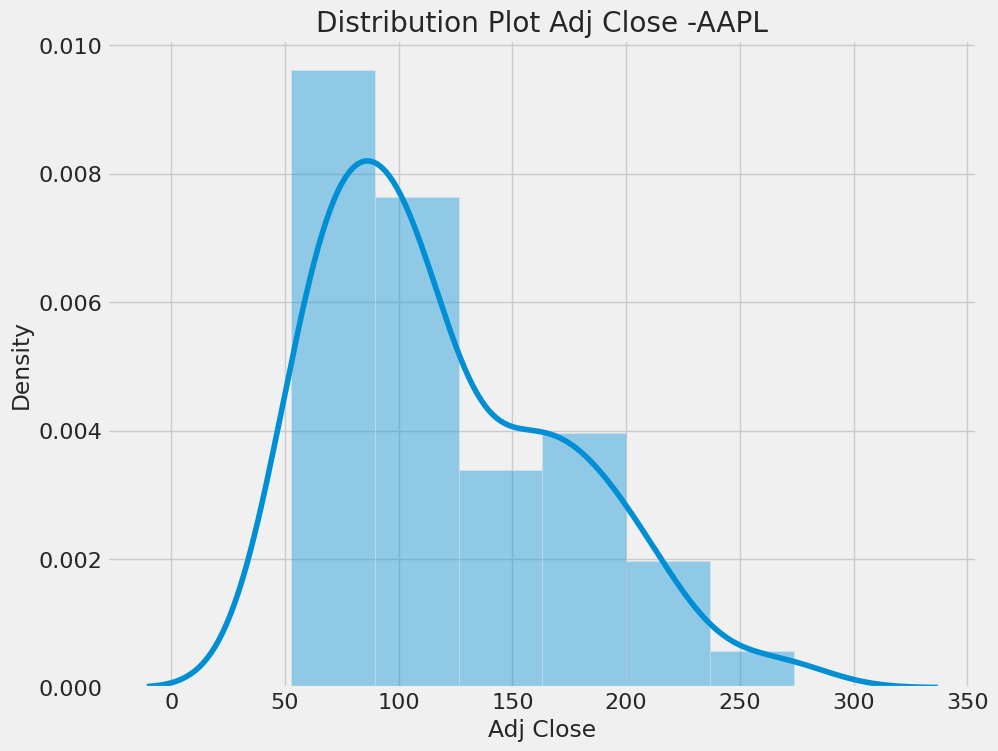

In [46]:
##Checking Distribution of Our Data
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


**Distribution Plot Inference** : Distribution shows Right Skew

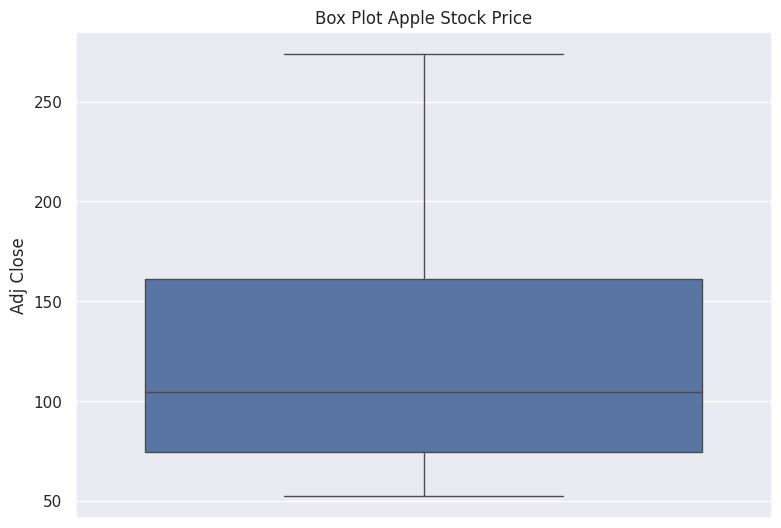

In [47]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.show()

**Box-Plot Inference** :-

->Distribution shows Right Skew

->Outlier towards the higher end around Stock price of 300$

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

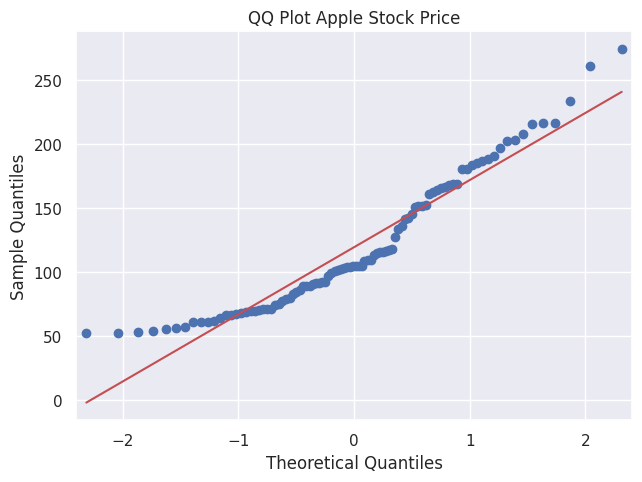

In [48]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

**QQ plot Inference :-**

->Heavy Tailed Distribution-Curve at Extremities

-> Shows extent of both right and left skews

->Shows Distribution is Not following Gaussian Normal Distribution


In [49]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.8054131572723979
Kurtosis of Distribution is  -0.11205074257880643


Stock Price is Heavily skewed -Right tailed Skewness


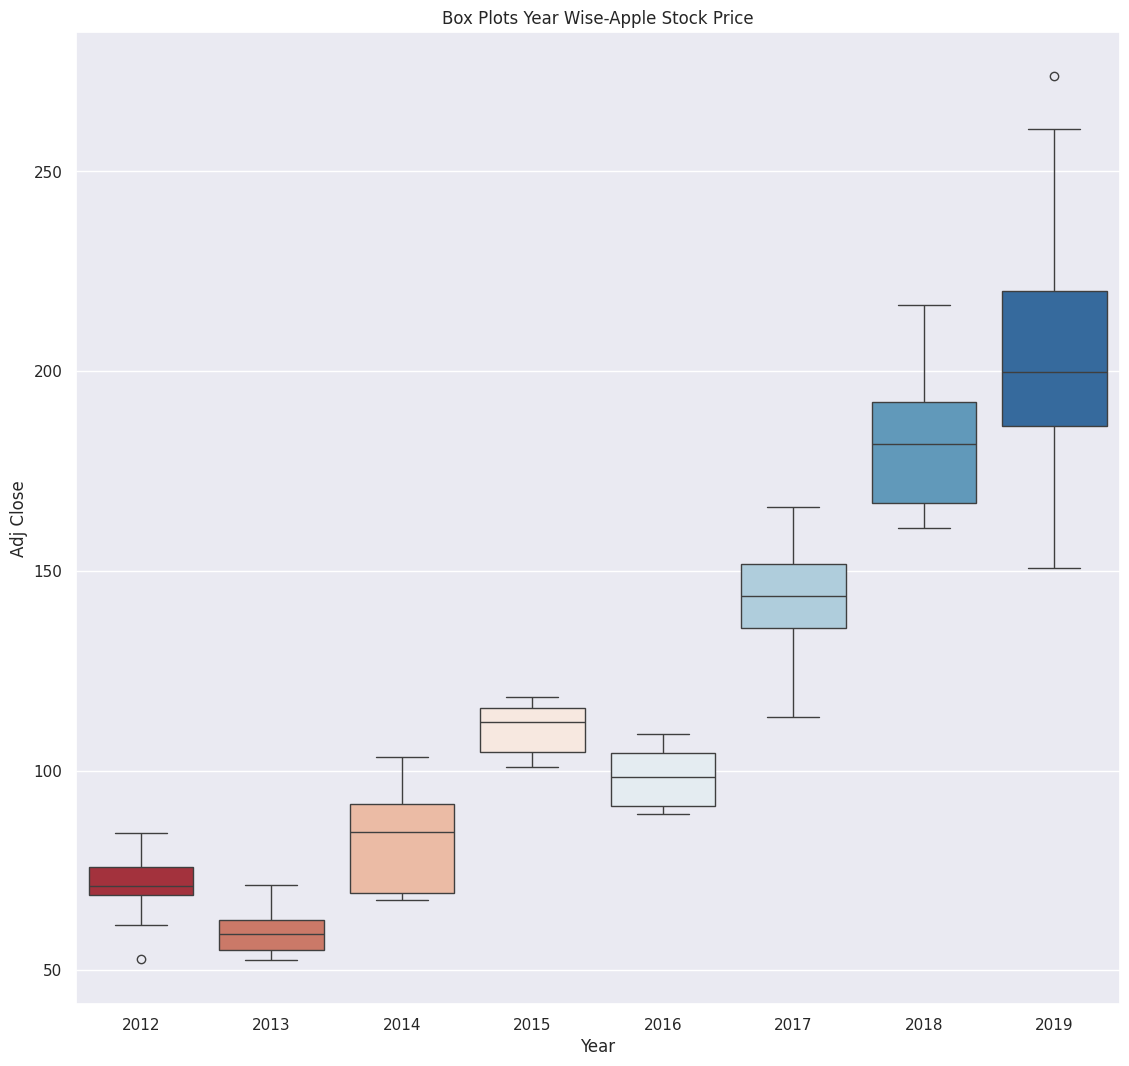

In [50]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.show()

**Inferences Box Plot**

->Outliers Present in Year 2012 and 2019

->Lot of Variability in Years 2014, 2017-19

->2019 most volatile year among all years

->Upward Rising Trend is shown

In [52]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  group_by_yr.append('df' + str(yr))

for enum,yr in enumerate(list_years):
   group_by_yr[enum] = monthly_data[monthly_data['Year'] == yr]['Adj Close']
   dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])

In [53]:
dict_IQR

{'2012': 6.933146515313851,
 '2013': 7.476562772903726,
 '2014': 22.34296344824017,
 '2015': 11.10740590584416,
 '2016': 13.310573720864653,
 '2017': 16.22455365139379,
 '2018': 25.26202036594205,
 '2019': 33.78399483999857}

Text(0, 0.5, 'InterQuartile Range')

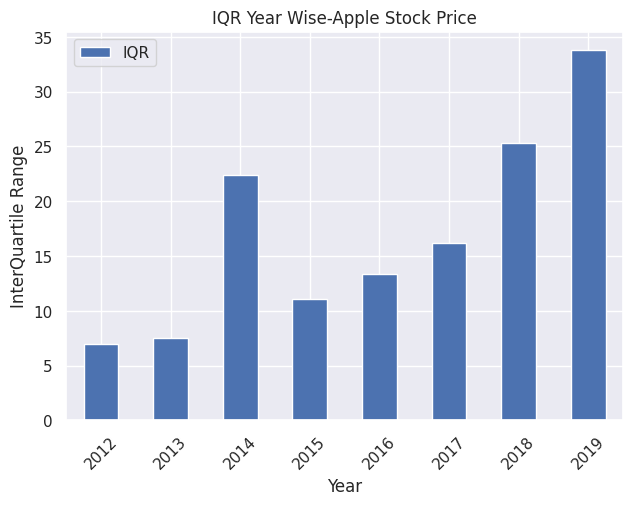

In [54]:
IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('IQR Year Wise-Apple Stock Price')
plt.ylabel('InterQuartile Range')


->When Data is Not Normal Inter-Quartile Range(IQR)  is Better Variability Metric than Standard Deviation as IQR is not affected by outliers.

->As observed with BoxPlot 2014 and 2019 are the most volatile Years for Apple Stock

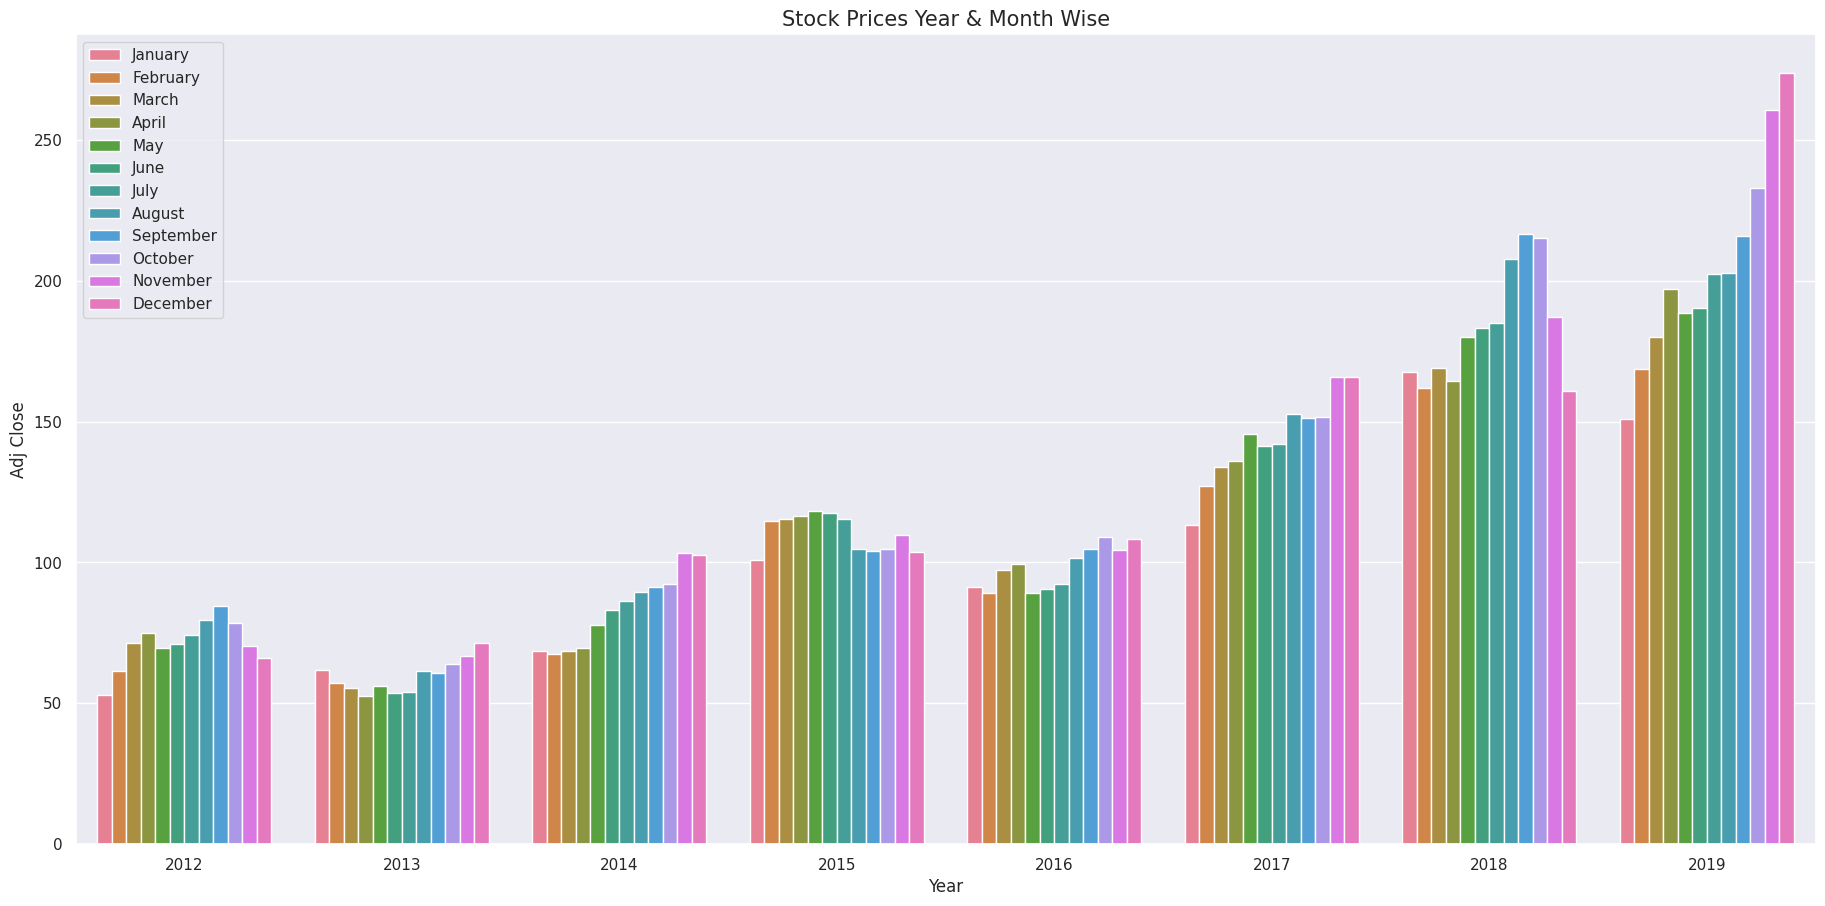

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time,the Wallstreet is excited about upcoming products .



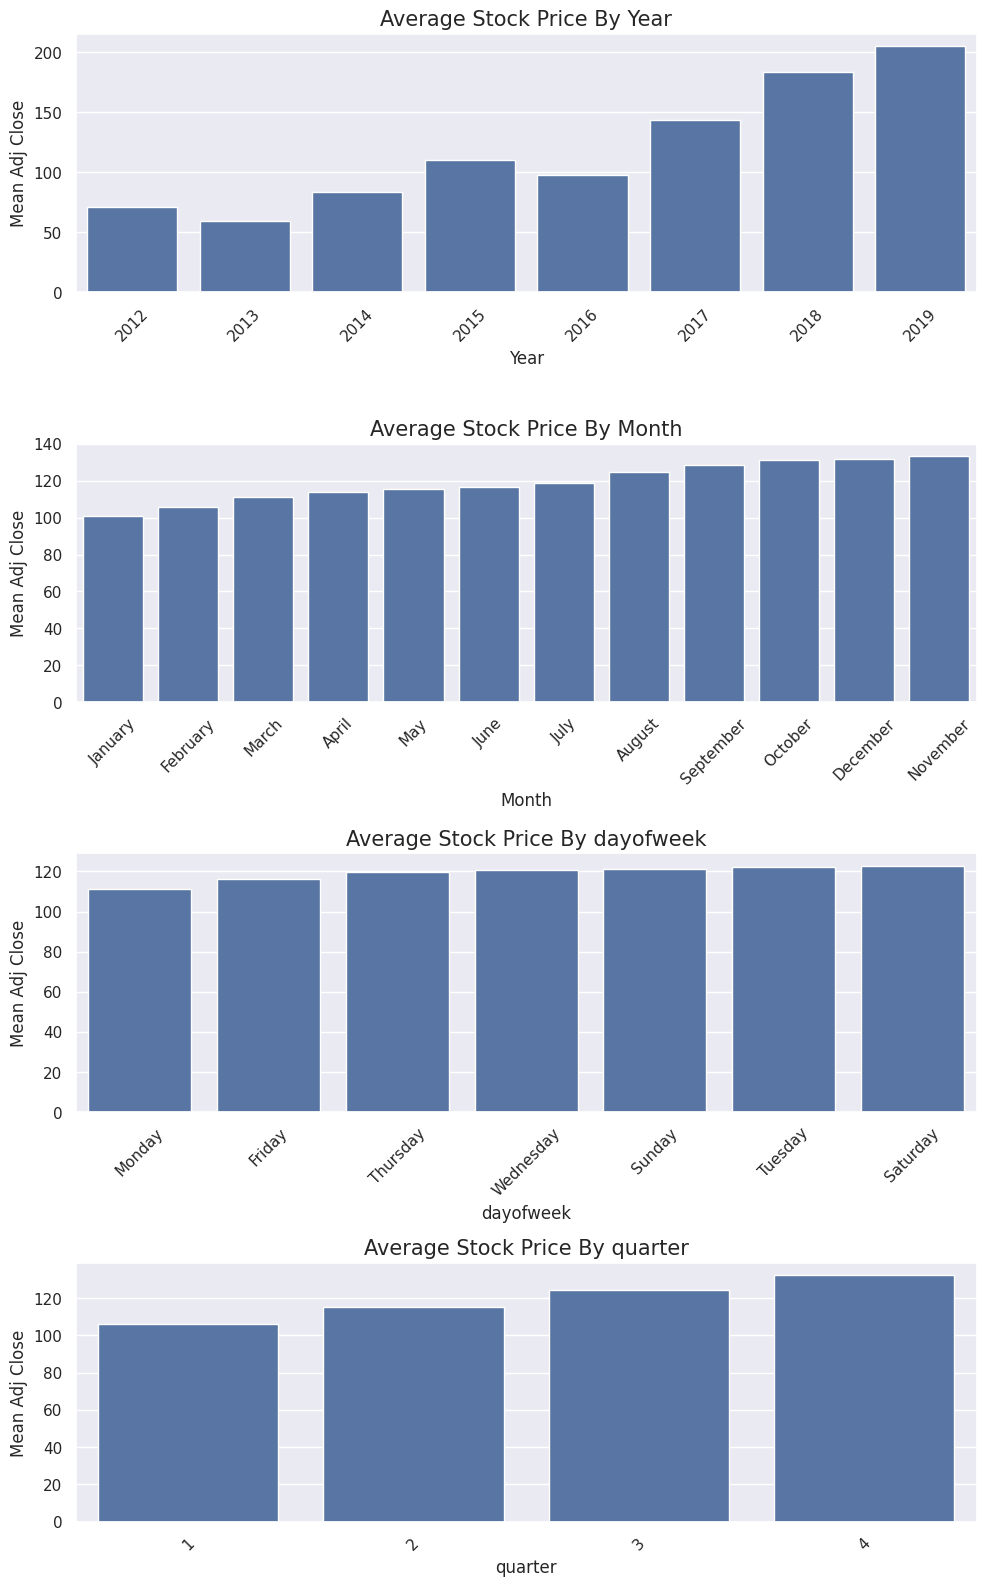

In [56]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)

plt.tight_layout(pad=1)

<Figure size 2000x1600 with 0 Axes>

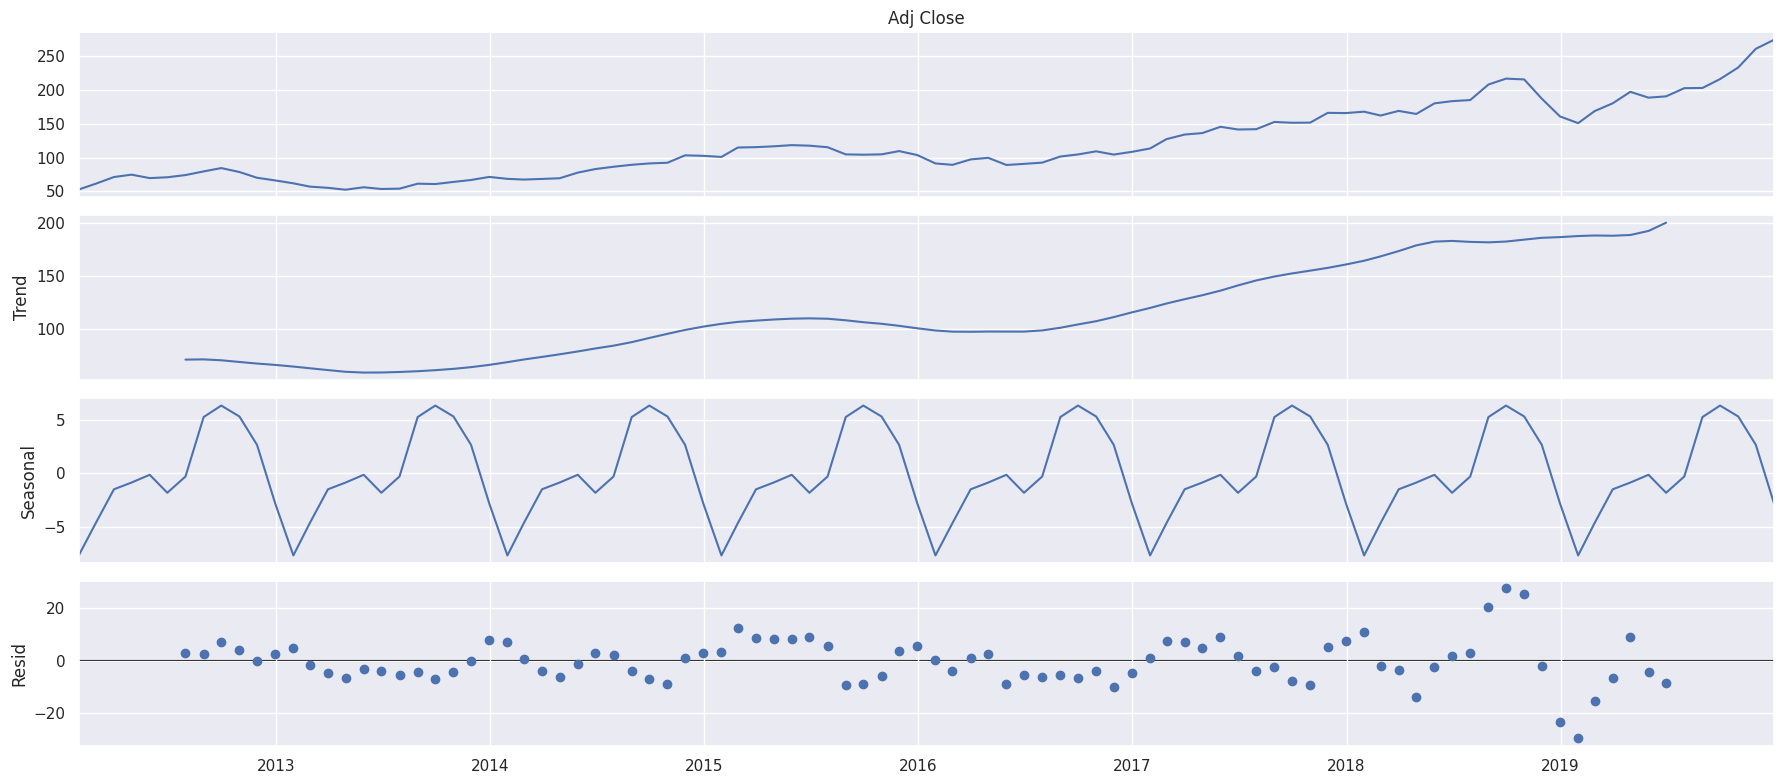

In [58]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive',period=12)
decomposed_series.plot()
plt.show()

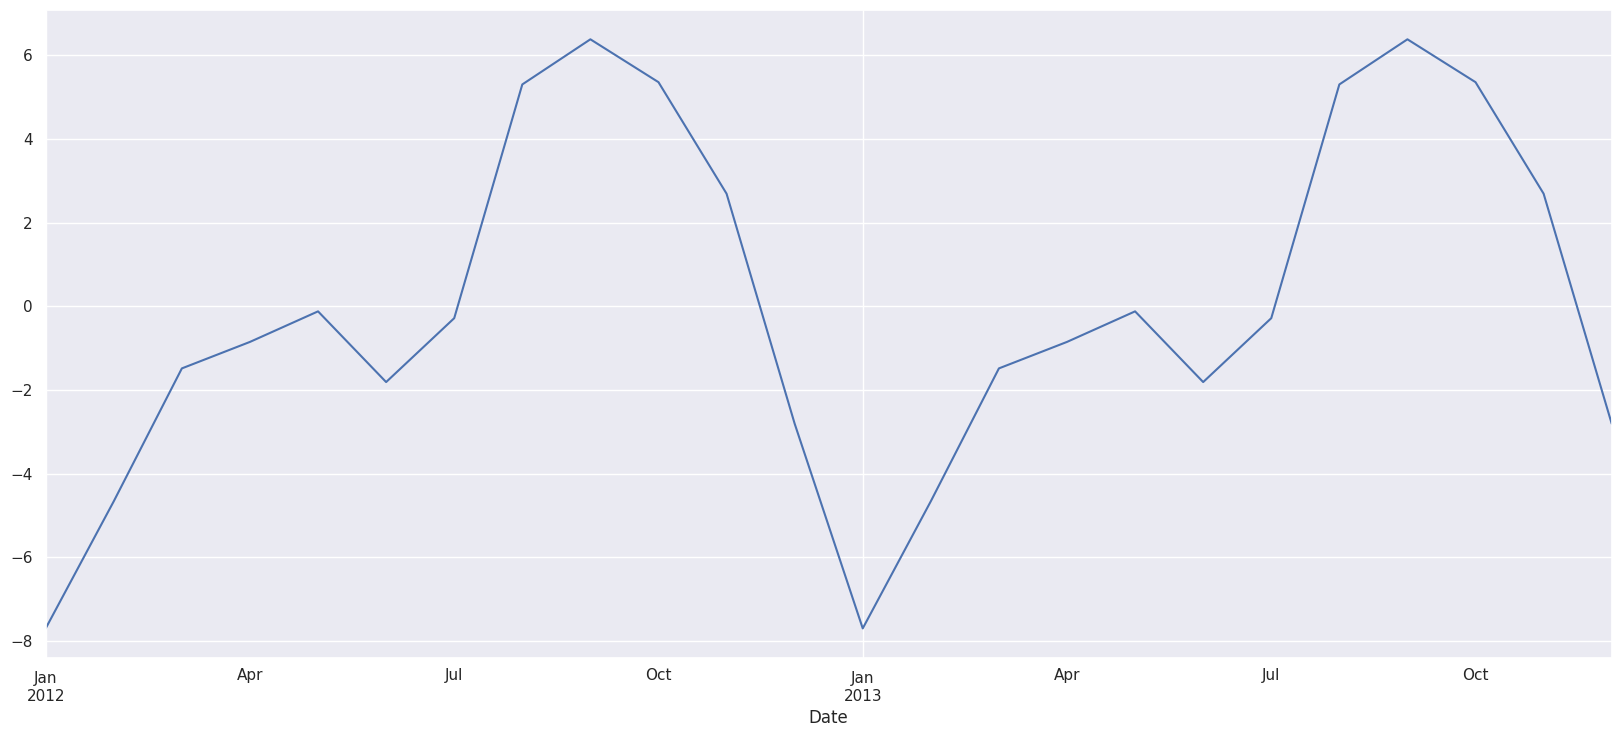

<Figure size 800x800 with 0 Axes>

In [59]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

In [60]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))

  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [61]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.339253
p-value: 0.996820
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Failed to Reject Ho-Time Series is Non-Stationary


Text(0.5, 0, 'Lags')

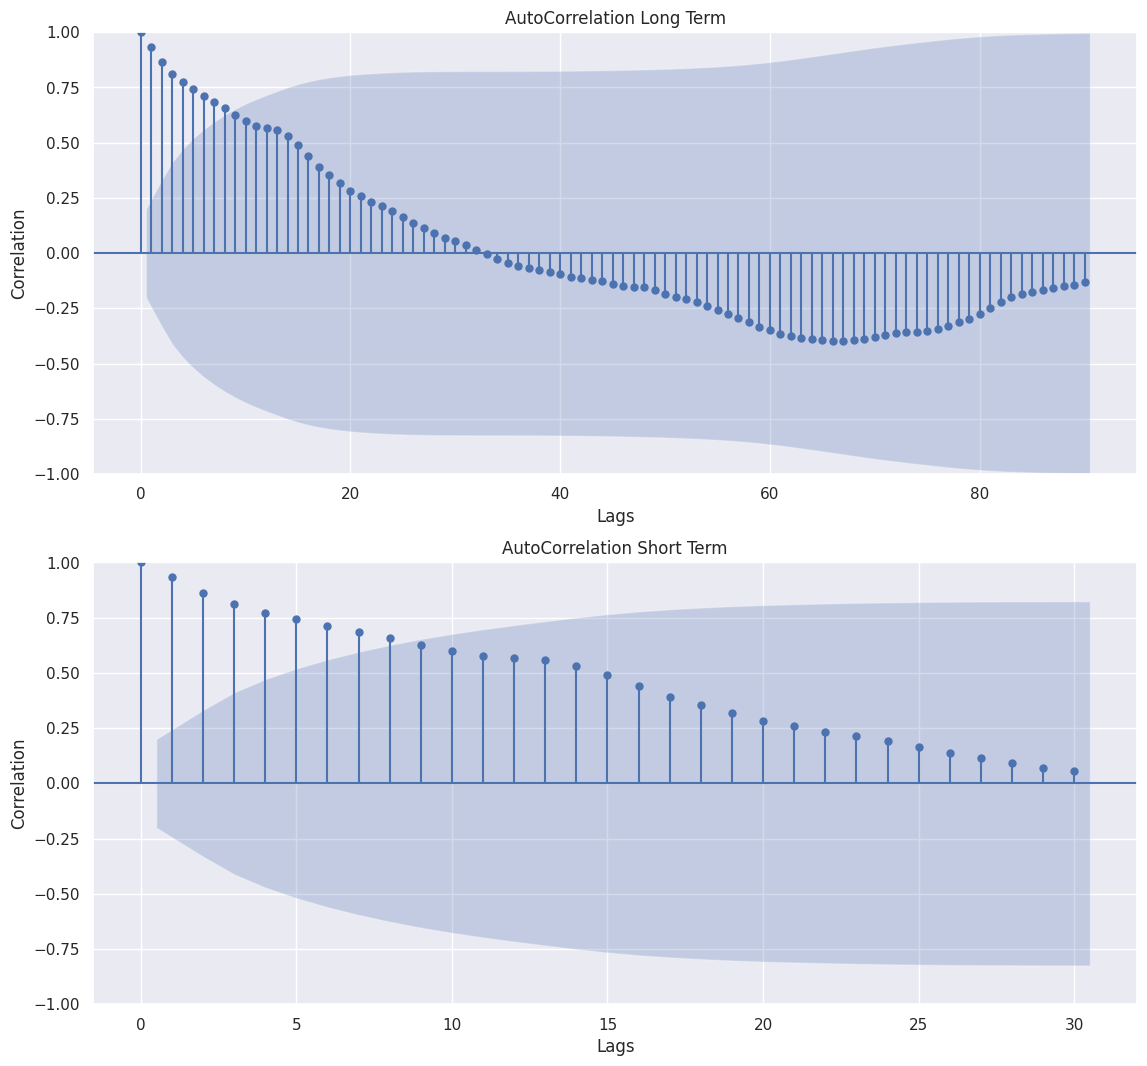

In [62]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

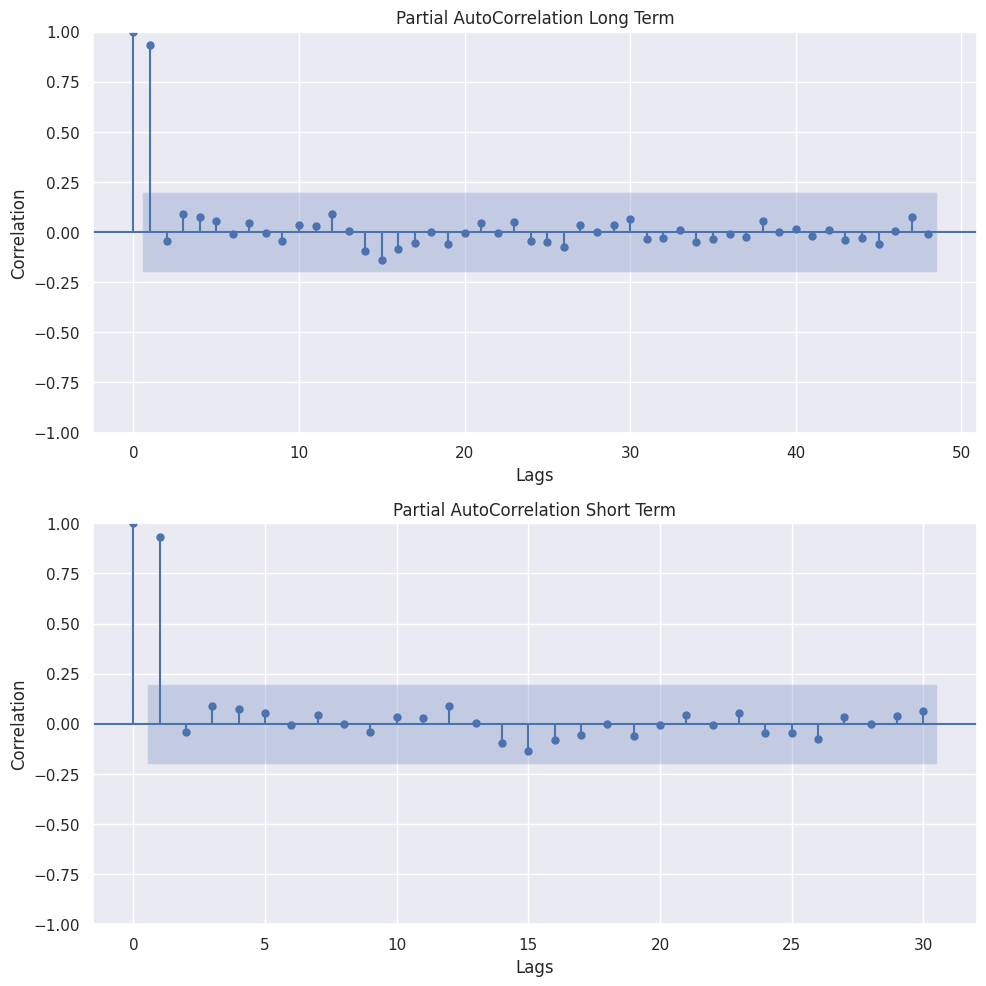

In [65]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=48,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [66]:
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

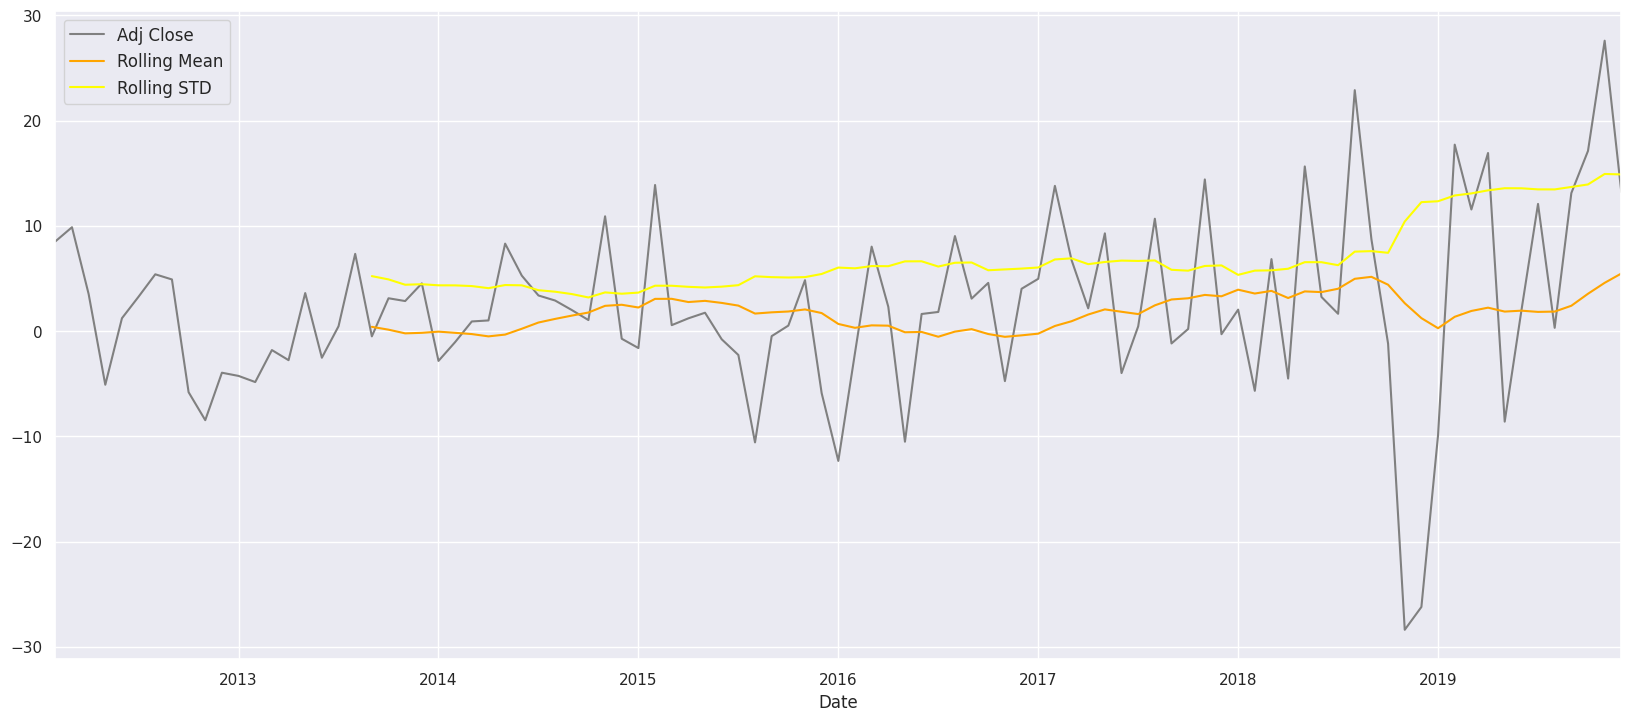

In [67]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [68]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501865
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


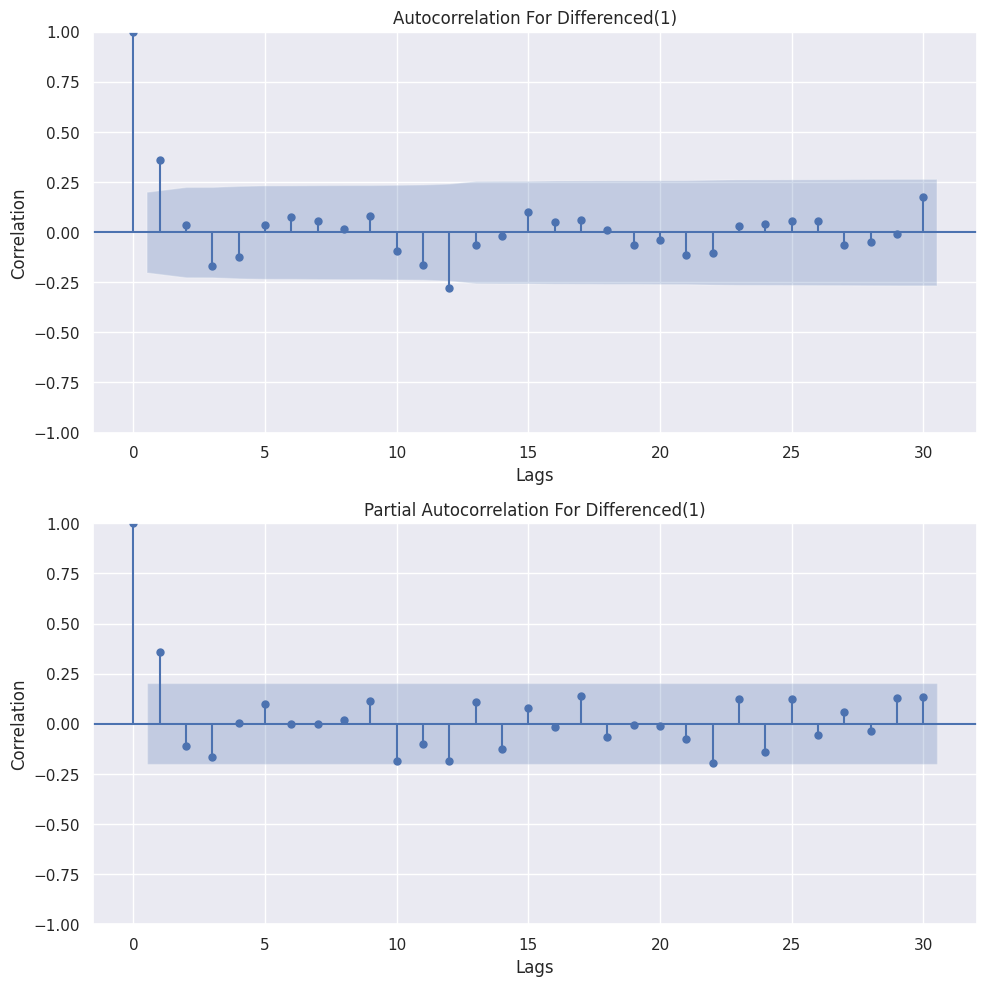

In [69]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)